# Lecture 9 - Avoiding Overfitting & The Bias-Variance Trade-Off

Last class, we introduce 3 strategies for avoiding overfitting:

1. Add more data

2. Apply Occam's Razor principle

3. Cross-validation

and the 4th strategy is...

# Regularization

In [4]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

In [5]:
def NoisySinusoidalData(N, a, b, gVar):
    x = np.linspace(a,b,N)
    noise = npr.normal(0,gVar,N)
    t = np.sin(2*np.pi*x) + noise
    return x, t

Ntrain, Ntest = 100, 30
a, b = [0,1] 
sigma_train, sigma_test = 0.5, 1
x_train, t_train = NoisySinusoidalData(Ntrain, a, b, sigma_train)    # training data and labels
x_true, t_true = NoisySinusoidalData(Ntrain, a, b, 0)             #true sine function
x_test, t_test = NoisySinusoidalData(Ntest, a, b, sigma_test) # test data and labels

In [6]:
def PolynomialRegression(x,t,M):
    X = np.array([x**m for m in range(M)]).T
    w = np.linalg.inv(X.T@X)@X.T@t
    y = X@w
    error = t-y
    return w, y, error

def PolynomialRegression_test(x,M,w):
    X = np.array([x**m for m in range(M)]).T 
    y = X@w
    return y

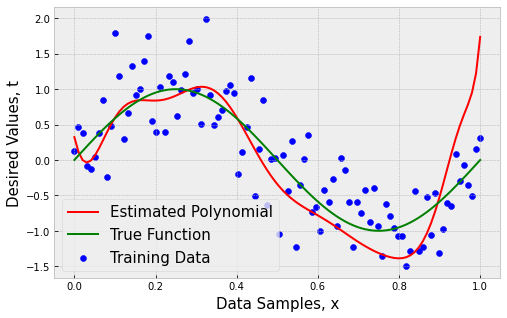

In [11]:
# Model Order
M = 20

# Find the parameters that fit the noisy sinusoidal
w, y, error = PolynomialRegression(x_train,t_train,M) 

plt.figure(figsize=(8,5))
plt.scatter(x_train,t_train, c='b', label='Training Data')
plt.plot(x_train,y,'r', label = 'Estimated Polynomial')
plt.plot(x_true,t_true,'g', label = 'True Function')
plt.legend(fontsize=15)
plt.xlabel('Data Samples, x',size=15)
plt.ylabel('Desired Values, t',size=15);

How do the weights look like?

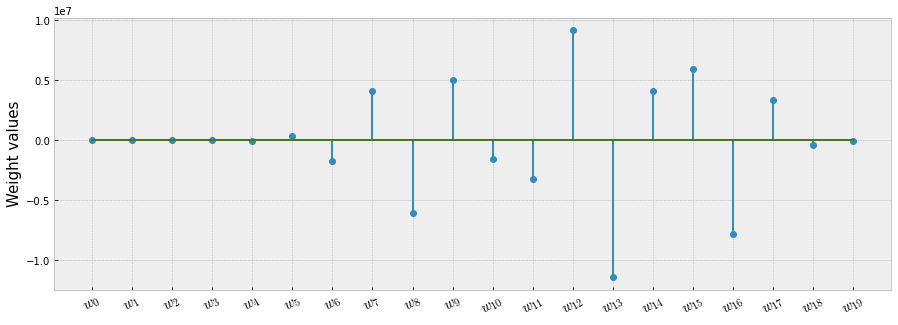

In [12]:
plt.figure(figsize=(15,5))
plt.stem(w)
plt.ylabel('Weight values', size=15)
plt.xticks(np.arange(len(w)), ['$w_{'+str(i)+'}$' for i in range(len(w))],
           rotation=30,fontsize=15);

As the model order increases, some of the weight values become very large! This is a good indication that we may be *memorizing* the training data.

* As $M$ increases, there are more parameters (more elements in the vector $\mathbf{w}$) to learn and, so, the model becomes more complex.

* The model order $M$ regulates the model *complexity*.
    * In a Polynomial regresssion it also controls the richness of the feature space.
    * Remember, **Occam's Razor** states that the simplest model that works for our data is usually the most appropriate and sufficient. Model simplicity can mean different things, but we can consider model order. 

As a model that is *complex*, it is more likely to *overfit* or *overtrain*.
* This essentially means it may "memorize" the input training data,
* Including all of the training data's noise!

## Adding a Weight Penalty or *Regularizer*

Suppose you have $N$ data points and you are trying to estimate $M$ coefficients. In other words, you are solving a set of $N$ equations with $M$ variables. We computed the solution for this linear system to be:

$$\mathbf{w} = \mathbf{X}^{\dagger}\mathbf{t} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{t}$$

**What happens when we have more unknowns than known variables, i.e., $M > N$? (This means the feature matrix $X$ will be a wide matrix.)** 

In other words, what happens when the data matrix, $\mathbf{X}^T\mathbf{X}$, is **not** full rank?

* Review *span* and *rank*: ["Inverse matrices, column space and null space", YouTube 3Blue1Brown video](https://www.youtube.com/watch?v=uQhTuRlWMxw&list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab&index=7)

In practice, it is quite often to obtain a **singular matrix** error. When this occurs, we know that the result $\mathbf{X}^T\mathbf{X}$ is **not invertible**.

<div class="alert alert-info">
    <b>Regularization</b> 

Regularization constrains (or regularizes) the parameter coefficients such that they cannot take a large value. Regularization of the model parameters discourages learning a more complex, as to avoid the risk of overfitting.
</div>

<div class="alert alert-info">
    <b>Ridge Regression</b> 

Adding the **weight decay** or **ridge** regularizer:

$$J_W(\mathbf{w}) = \frac{1}{2}\mathbf{w}^T\mathbf{w} = \left\Vert\mathbf{w}\right\Vert_2^2$$

We build the objective function:

$$J(\mathbf{w}) = J_D(\mathbf{w}) + \lambda J_W(\mathbf{w}) = \frac{1}{N} \left\Vert \mathbf{t} - \mathbf{X}\mathbf{w} \right\Vert^2_2 + \lambda\left\Vert\mathbf{w}\right\Vert_2^2$$

where $\lambda$ is the **regularization coefficient** that controls the relative importance of the data-dependent error $J_D(\mathbf{w})$ and the regularization term $J_W(\mathbf{w})$.
</div>

* This particular choice of regularizer is known in the machine learning literature as **weight decay** or **ridge** because in sequential learning algorithms, it encourages weight values to decay towards zero, unless supported by the data.

* It has the advantage that the error function remains a quadratic function of $\mathbf{w}$, and so its exact minimizer can be found in closed form.

* A more general regularizer is sometimes used, for which the regularized error takes the form:

$$J(\mathbf{w}) = \frac{1}{N} \left\Vert \mathbf{t} - \mathbf{X}\mathbf{w} \right\Vert^2_2 + \lambda\left|\mathbf{w}\right|^q$$

where $q=2$ corresponds to the quadratic regularizer. 

* The case of $q = 1$ is known as the **lasso** regularizer. It has the property that if $\lambda$ is sufficiently large, some of the coefficients $w_j$ are driven to zero, leading to a **sparse** model in which the corresponding basis functions play no role.

<div class="alert alert-info">
    <b>Lasso Regression</b> 

Adding the **lasso** regularizer:

$$J_W(\mathbf{w}) = \left\Vert\mathbf{w}\right\Vert_1$$

We build the objective function:

$$J(\mathbf{w}) = \frac{1}{N} \left\Vert \mathbf{t} - \mathbf{X}\mathbf{w} \right\Vert^2_2 + \lambda\left\Vert\mathbf{w}\right\Vert_1$$

where $\lambda$ is the **regularization coefficient** that controls the relative importance of the data-dependent error $J_D(\mathbf{w})$ and the regularization term $J_W(\mathbf{w})$.
</div>

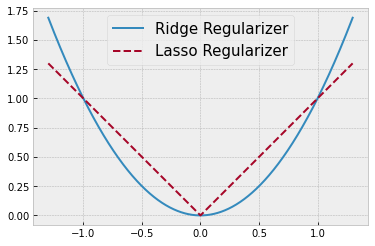

In [14]:
x = np.linspace(-1.3,1.3,1000)

plt.plot(x,x**2, label = 'Ridge Regularizer')
plt.plot(x,np.abs(x), '--', label = 'Lasso Regularizer')
plt.legend(fontsize=15);

**Observations:**

* Ridge regularizer:
    * prefers to weight parameter elements to be non-zero
    * is highly affected by outliers

* Lasso regularizer:
    * promotes sparsity
    * it is not as affected by outliers

<div class="alert alert-info">
    <b>Regularized Least Squares</b> 

We fit the linear regression model such that the *regularized* objective function $J(\mathbf{w})$ is minimized:

$$\arg_{\mathbf{w}}\min J(\mathbf{w})$$
    
where   
    
\begin{align} 
J(\mathbf{w}) &= J_D(\mathbf{w}) + \lambda J_W(\mathbf{w}) \\
&= \frac{1}{N} \left\Vert \mathbf{t} - \mathbf{X}\mathbf{w} \right\Vert^2_2 + \lambda\left\Vert\mathbf{w}\right\Vert_2^2
\end{align}

This is often referred to as the **ridge regression**. The optimal solution $\mathbf{w}^*$ is:

$$\mathbf{w}^* = \left(\mathbf{X}^T\mathbf{X} + \lambda\mathbf{I}\right)^{-1}\mathbf{X}^T\mathbf{t} $$

where $\mathbf{I}$ is an identity matrix of size $M\times M$.
</div>

* We are **diagonally loading** the matrix $\mathbf{X}^T\mathbf{X}$ with the regularizer term $\lambda$.
* This is "filling" the feature space such that the matrix $\mathbf{X}^T\mathbf{X}$ becomes full rank.
* What happens when $\lambda \rightarrow \infty$?

**In code, how would you change the function ```PolynomialRegression``` created above to include the regularization term?**

In [15]:
def PolynomialRegression_reg(x,t,M,lam):
    X = np.array([x**m for m in range(M)]).T
    w = np.linalg.inv(X.T@X + lam*np.eye(M))@X.T@t
    
    y = X@w
    error = t-y
    return w, y, error

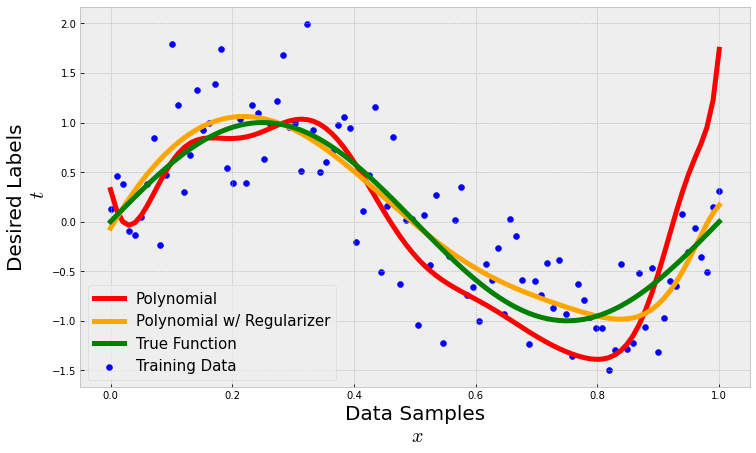

In [20]:
M = 20
lam = 0.0001

_, y, _ = PolynomialRegression(x_train,t_train,M) 
_, yreg, _ = PolynomialRegression_reg(x_train,t_train,M,lam) 

fig=plt.figure(figsize=(12,7))
plt.scatter(x_train,t_train,c='b', label='Training Data')
plt.plot(x_train,y,'r',linewidth=5, label = 'Polynomial')
plt.plot(x_train,yreg,'orange',linewidth=5, label = 'Polynomial w/ Regularizer')
plt.plot(x_true,t_true,'g',linewidth=5, label = 'True Function')
plt.legend(fontsize=15)
plt.xlabel('Data Samples\n $x$', fontsize=20)
plt.ylabel('Desired Labels\n $t$', fontsize=20);

# In Summary: How to Avoid Overfitting?

<div class="alert alert-info">
    <b>Overfitting</b> 

In model fitting, a model is said to have **overfit** to the training data, if it is *not* able to *generalize* to new and unknown data. We can observe this effect as the training error is small but the error in the test data is very large.

In other words, overfitting means that the *true* underlying model of the data is not estimated/learned properly, instead the model returned a poor representation that **memorized** the training samples **and** any meaningless noise in the data.
</div>

<div class="alert alert-info">
    <b>Underfitting</b> 

In model fitting, a model is said to have **underfit** if the error in both in training and test data sets are still decreasing. 

An underfitted model is not complex enough to model all the characteristics in the data.
</div>

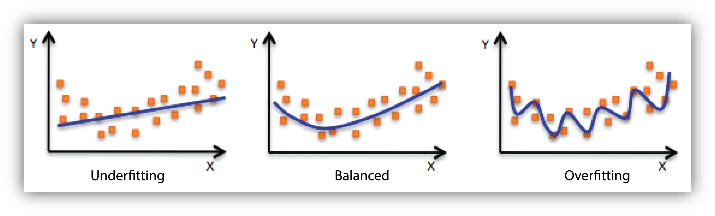

In [1]:
from IPython.display import Image
Image('figures/fits.png',width=700)

Strategies for avoiding overfitting:

1. Add more data

2. Apply Occam's Razor principle

3. Cross-validation

4. Regularization

# The Bias-Variance Trade-Off

Regardless of the form and number of the basis functions, we still face the problem of **overfitting**. In fact, this is true for any ML model.

The problem of searching for *optimal* model complexity has been extensively studied; in fact, we are *simply* searching for a level of complexity that fits the data *well* yet *not too well*. This phenomenon can be summarized by the **bias-variance trade-off** of complexity.

<div class="alert alert-info">
    <b>The Bias-Variance Trade-Off</b> 

The bias-variance trade-off is a way of analyzing a learning algorithm's expected generalization error with respect to a particular problem as a sum of three terms, the bias, variance, and a quantity called the irreducible error, resulting from noise in the problem itself.
</div>

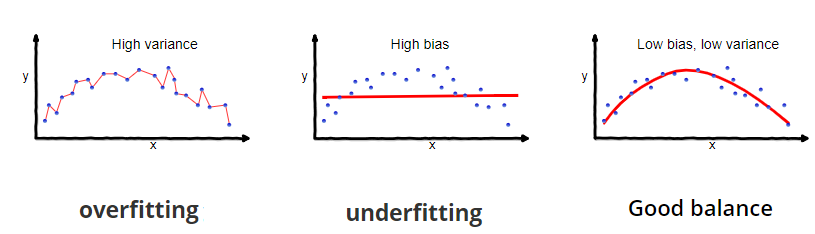

In [2]:
Image('figures/BiasvsVariance.png',width=800)

Consider the cost function:

$$J(\mathbf{x},\mathbf{w}) = \frac{1}{2} \Vert \mathbf{t} - \mathbf{y}\Vert_2^2$$

where $\mathbf{y} = \sum_{j=0}^{M} w_j\phi_j(\mathbf{x})$

We can model each $J$ as a random variable, and so its expected value, over some data set $D$, is given by:

\begin{align}
E\left[J(\mathbf{x},\mathbf{w})\right] &= E\left[\frac{1}{2} \Vert \mathbf{t} - \mathbf{y}\Vert_2^2\right] \\
&=E\left[(\mathbf{t} - \mathbf{y})^2\right]
\end{align}

where $\mathbf{y}$ is the model and $\mathbf{t}$ is the desired response. For the experimental design section, we learned that this quantity dependent on the particular data set $D$. And so, we can take its average over the ensemble of data sets. If we add and subtract the quantity $E_D[\mathbf{y}]$.

* In practice we really only have access to $E_D[\mathbf{y}]$
* But $\mathbf{y}$ here, is simply representing the model *if* we had an *infinite* amount of data and could effectively represent it.

\begin{align}
E\left[(\mathbf{t} - \mathbf{y})^2\right] &= E\left[(\mathbf{t} - E_D[\mathbf{y}] + E_D[\mathbf{y}] - \mathbf{y})^2\right]\\
&= E\left[(\mathbf{t} - E_D[\mathbf{y}])^2\right] + E\left[(E_D[\mathbf{y}] - \mathbf{y})^2\right] + E\left[2(\mathbf{t} - E_D[\mathbf{y}])(E_D[\mathbf{y}] - \mathbf{y})\right]\\
&= \text{variance } +  \text{bias } +  \text{irreducible error} 
\end{align}